# Медианный фильтр

Медианный фильтр-это нелинейный метод цифровой фильтрации, часто используемый для удаления шума из изображения или сигнала. Такое шумоподавление является типичным этапом предварительной обработки для улучшения результатов последующей обработки (например, обнаружение краев изображения).

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
import numpy as np
import cv2
import argparse

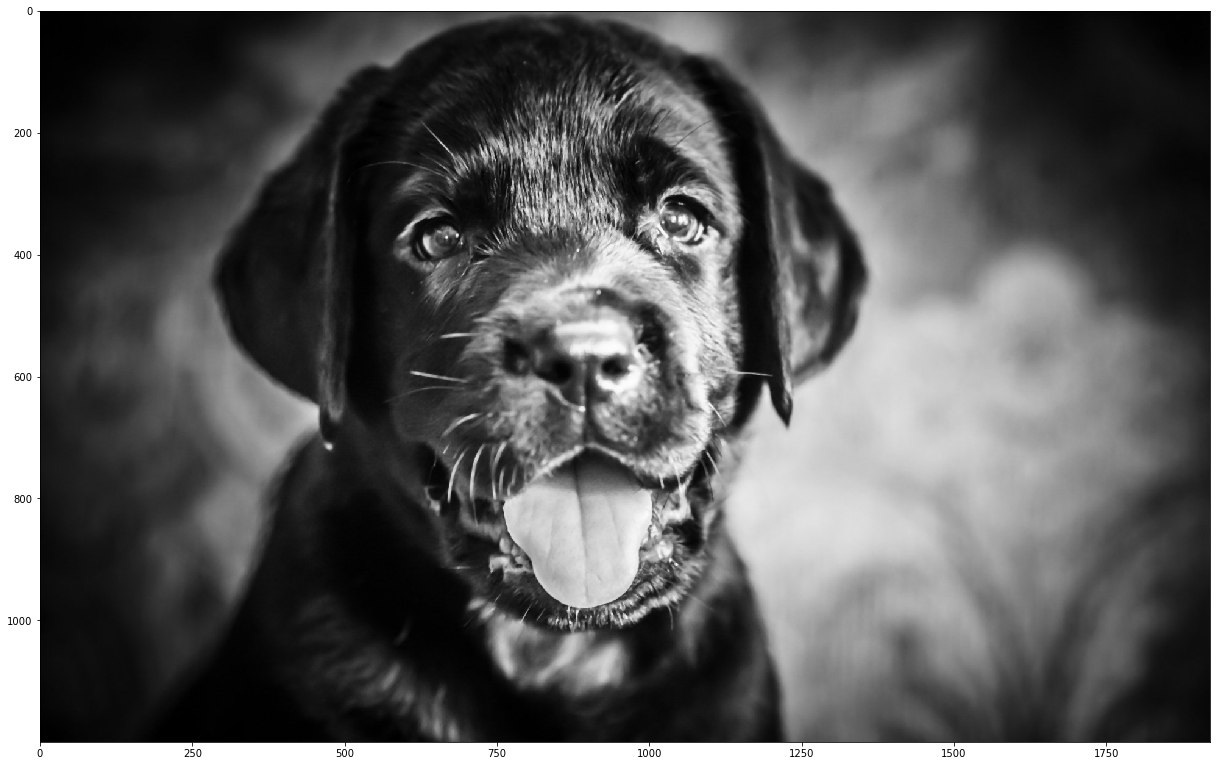

In [16]:
image = imread("dog.jpg")
processed_image = cv2.medianBlur(image, 3)
cv2.imwrite("processed_image.jpg", processed_image)
plt.figure(figsize=(17,17))
imshow("processed_image.jpg")

In [17]:
def MedianFiltering(img) :
    B, G, R = cv2.split(img)
    # Медианная фильтрация синего канала
    H = np.zeros (256, dtype = int)
    for row in range(1, len(B) - 1) :
        H = np.zeros (256, dtype = int)
        med = np.uint8(np.median(B[row - 1 : row + 2, 0:3]))
        n = 0
        for i in range(-1, 2) :
            for j in range(0, 3) :
                H[B[row+i][j]] = H[B[row+i][j]] + 1
                if B[row+i][j] <= med :
                    n = n + 1
        for col in range(1, len(B[row]) - 1) :
            if col == 1 :
                None
            else :
                for i in range(-1, 2) :
                    H[B[row+i][col-2]] = H[B[row+i][col-2]] - 1
                    if B[row+i][col-2] <= med :
                        n = n - 1
                    H[B[row+i][col+1]] = H[B[row+i][col+1]] + 1
                    if B[row+i][col+1] <= med :
                        n = n + 1
                if n > 5 :
                    while n > 5 :
                        if med == 0 :
                            break
                        n = n - H[med]
                        med = med - 1
                elif n < 5 :
                    while n < 5 :
                        med = med + 1
                        n = n + H[med]
            sum = 0
            for k in range(med + 1) :
                sum = sum + H[k]
            H[B[row][col]] = H[B[row][col]] - 1
            if med < B[row][col] :
                n = n + 1
            B[row][col] = med
            H[med] = H[med] + 1
         # Медианная фильтрация зелёного канала
    H = np.zeros (256, dtype = int)
    for row in range(1, len(G) - 1) :
        H = np.zeros (256, dtype = int)
        med = np.uint8(np.median(G[row - 1 : row + 2, 0:3]))
        if med == -128 :
            print(G[row - 1 : row + 2, 0:3])
        n = 0
        for i in range(-1, 2) :
            for j in range(0, 3) :
                H[G[row+i][j]] = H[G[row+i][j]] + 1
                if G[row+i][j] <= med :
                    n = n + 1
        for col in range(1, len(G[row]) - 1) :
            if col == 1 :
                None
            else :
                for i in range(-1, 2) :
                    H[G[row+i][col-2]] = H[G[row+i][col-2]] - 1
                    if G[row+i][col-2] <= med :
                        n = n - 1
                    H[G[row+i][col+1]] = H[G[row+i][col+1]] + 1
                    if G[row+i][col+1] <= med :
                        n = n + 1
                if n > 5 :
                    while n > 5 :
                        if med == 0 :
                            break
                        n = n - H[med]
                        med = med - 1
                elif n < 5 :
                    while n < 5 :
                        med = med + 1
                        n = n + H[med]
            H[G[row][col]] = H[G[row][col]] - 1
            if med < G[row][col] :
                n = n + 1
            G[row][col] = med
            H[med] = H[med] + 1
         # Медианная фильтрация красного канала
    H = np.zeros (256, dtype = int)
    for row in range(1, len(R) - 1) :
        H = np.zeros (256, dtype = int)
        med = np.uint8(np.median(R[row - 1 : row + 2, 0:3]))
        if med == -128 :
            print(R[row - 1 : row + 2, 0:3])
        n = 0
        for i in range(-1, 2) :
            for j in range(0, 3) :
                H[R[row+i][j]] = H[R[row+i][j]] + 1
                if R[row+i][j] <= med :
                    n = n + 1
        for col in range(1, len(R[row]) - 1) :
            if col == 1 :
                None
            else :
                for i in range(-1, 2) :
                    H[R[row+i][col-2]] = H[R[row+i][col-2]] - 1
                    if R[row+i][col-2] <= med :
                        n = n - 1
                    H[R[row+i][col+1]] = H[R[row+i][col+1]] + 1
                    if R[row+i][col+1] <= med :
                        n = n + 1
                if n > 5 :
                    while n > 5 :
                        if med == 0 :
                            break
                        n = n - H[med]
                        med = med - 1
                elif n < 5 :
                    while n < 5 :
                        med = med + 1
                        n = n + H[med]
            sum = 0
            H[R[row][col]] = H[R[row][col]] - 1
            if med < R[row][col] :
                n = n + 1
            R[row][col] = med
            H[med] = H[med] + 1
    
    return cv2.merge([B,G,R])

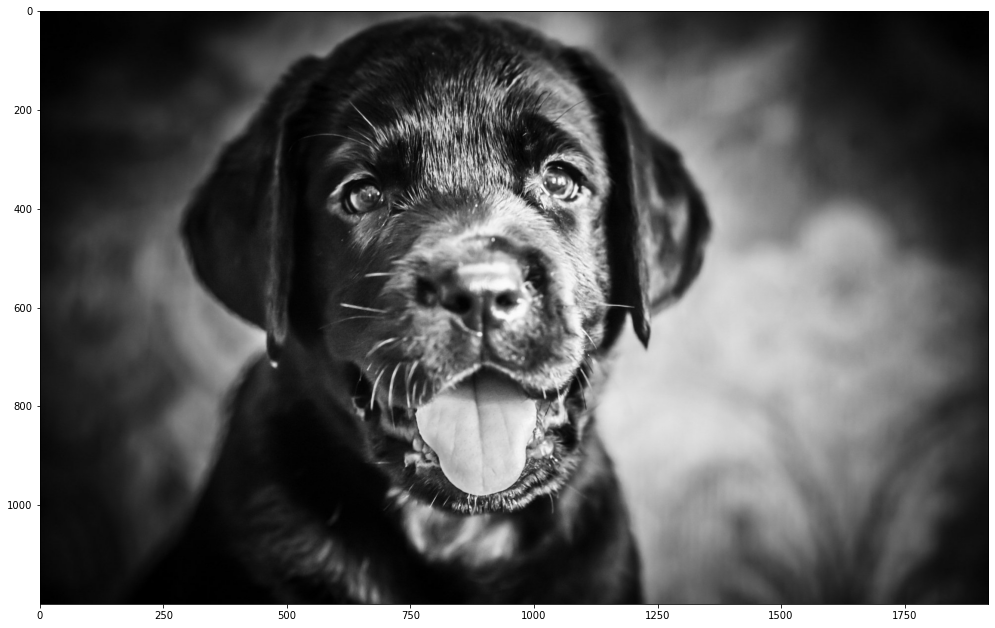

In [18]:
image = cv2.imread("dog.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(17,17))
plt.imshow(image)

In [19]:
median_blurred = MedianFiltering(image)

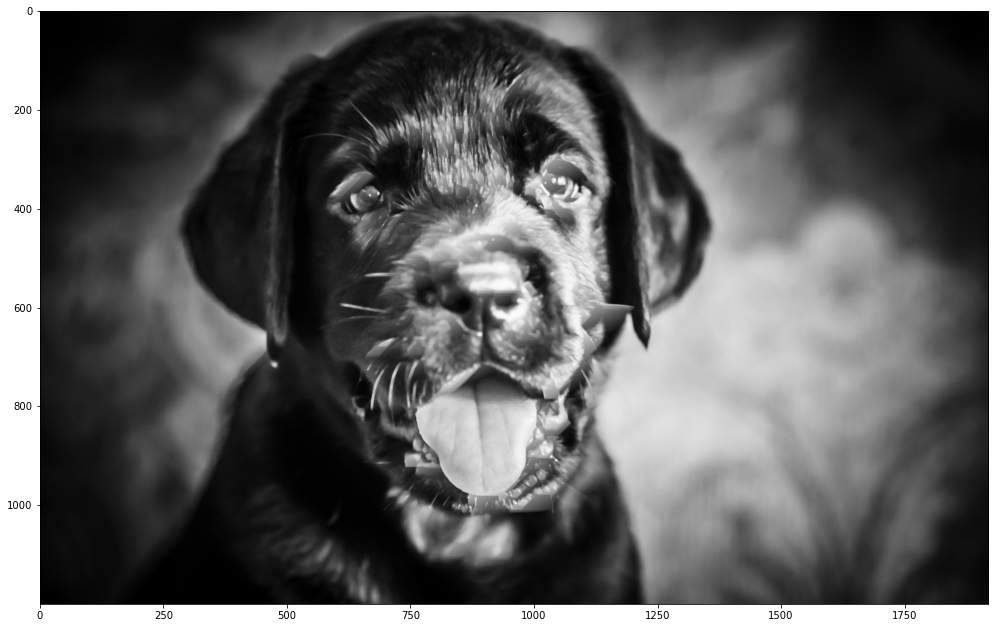

In [20]:
plt.figure(figsize=(17,17))
plt.imshow(median_blurred)

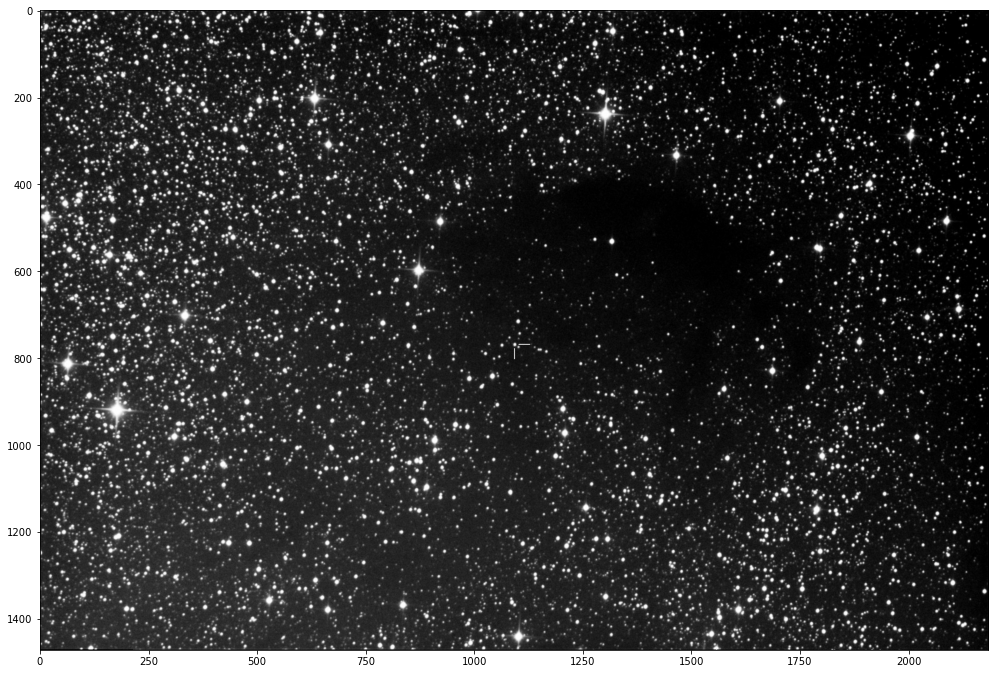

In [21]:
image = cv2.imread("space.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(17,17))
plt.imshow(image)

In [22]:
median_blurred = MedianFiltering(image)

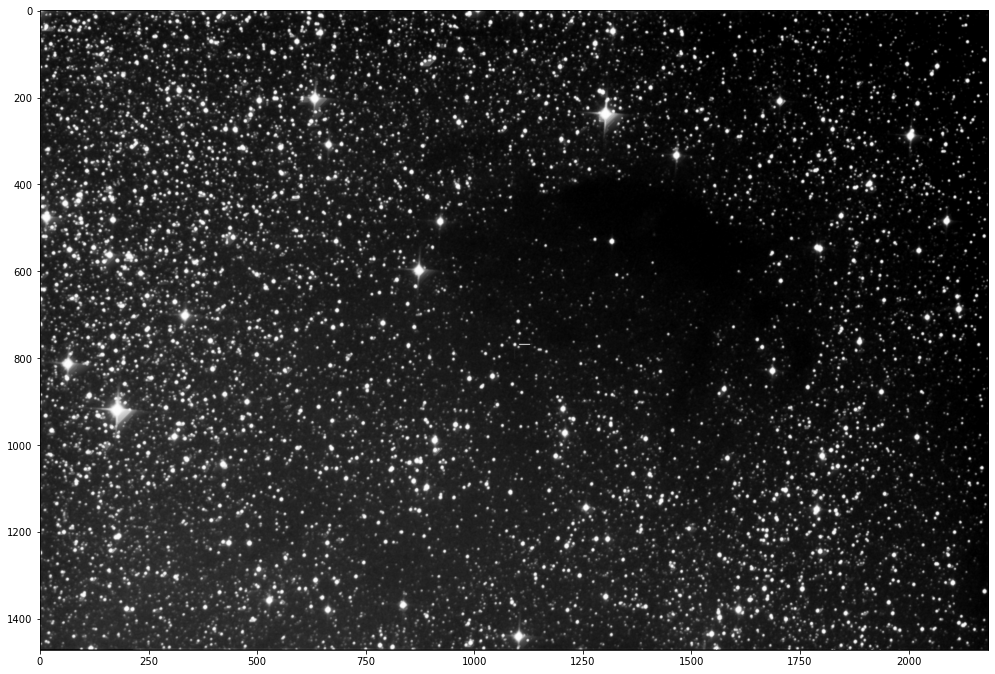

In [23]:
plt.figure(figsize=(17,17))
plt.imshow(median_blurred)